# Randomness

`numpy.random`: simulate randomness in python

`numpy`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style()

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': '#e1e1e1',
          'axes.facecolor': '#efefef',
          'axes.grid': True,
          'axes.labelcolor': '#444444',
          'axes.labelsize': 'large',
          'axes.linewidth': 2.0,
          'axes.prop_cycle': cycler('color', ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']),
          'axes.spines.right': False,
          'axes.spines.top': False,
          'axes.titlesize': 'x-large',
          'figure.facecolor': '#f7f7f7',
          'font.family': ['Source Sans Pro', 'DejaVu Sans'],
          'font.size': 14.0,
          'grid.alpha': 0.9,
          'grid.color': '#e1e1e1',
          'grid.linewidth': 1.0,
          'lines.color': '#e1e1e1',
          'text.color': '#444444',
          'xtick.color': '#444444',
          'xtick.direction': 'out',
          'xtick.major.size': 10.0,
          'ytick.color': '#444444',
          'ytick.direction': 'out',
          

## Probability

`Event`: can be either countable or uncountable

`Discrete random variables`: random variables with countable event spaces

`Continuous random variables`: random variables with uncountable event spaces

`probability`:

1: >=0 and <=1

2: independence

## Simulating Randomness in Python

`Uniform(0,1)`

In [3]:
np.random.rand()

0.03159884255556811

In [4]:
np.random.rand(25) #randomly generate 25 numbers between 0 and 1

array([0.11941198, 0.11265155, 0.12074282, 0.66504062, 0.44020547,
       0.7294509 , 0.9735814 , 0.76180985, 0.41642142, 0.52712767,
       0.13928681, 0.06475205, 0.3672896 , 0.55614847, 0.0321312 ,
       0.38938716, 0.34097489, 0.85357378, 0.88422374, 0.06433538,
       0.90380282, 0.46564864, 0.7018024 , 0.10957713, 0.6264963 ])

In [5]:
np.random.rand(5,5) #randomly generate 5 array, each array has 5 elements

array([[9.00258222e-01, 6.53085615e-01, 4.29761830e-01, 6.47657286e-01,
        3.65583375e-04],
       [3.27684573e-01, 7.28057616e-01, 9.15953181e-01, 9.58165636e-01,
        2.68707966e-01],
       [8.44959981e-01, 8.04562039e-01, 2.98217508e-01, 3.97593237e-01,
        1.11963818e-01],
       [3.84535477e-01, 4.15113508e-01, 3.18562275e-01, 3.44912923e-01,
        3.99565471e-02],
       [5.29395912e-01, 7.15265146e-01, 4.13316685e-01, 6.69723864e-04,
        9.72984865e-01]])

In [6]:
np.random.rand(2,3,4)
#randomly generate two array, each array contains 
#3 subarrays, each sub has four elements

array([[[0.05520369, 0.27189756, 0.54577701, 0.24185228],
        [0.11688337, 0.55477437, 0.35933819, 0.47029135],
        [0.73463266, 0.55605242, 0.13082302, 0.6526874 ]],

       [[0.64444004, 0.03922173, 0.30849504, 0.30753802],
        [0.70269551, 0.31401058, 0.637785  , 0.70444561],
        [0.21970361, 0.02633376, 0.44471898, 0.35516467]]])

## Why De We Need Randomness?

`The Law of Large Number`: under relatively general conditions, the distribution as the number of simulated events goes to infinity.

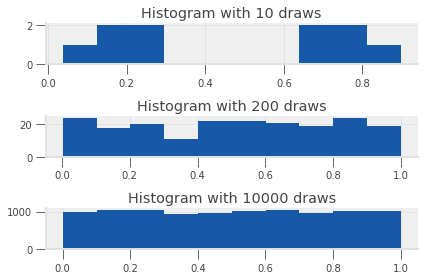

In [9]:
# Draw varous numbers of uniform[0,1] random variables
draws_10=np.random.rand(10)
draws_200=np.random.rand(200)
draws_10000=np.random.rand(10000)

# Plot their histograms
fig,ax=plt.subplots(3)

ax[0].set_title("Histogram with 10 draws")
ax[0].hist(draws_10)

ax[1].set_title("Histogram with 200 draws")
ax[1].hist(draws_200)

ax[2].set_title("Histogram with 10000 draws")
ax[2].hist(draws_10000)

fig.tight_layout()

## Discrete Distributions

Countable number of possible values

Example:


For example, consider a small business loan company.

Imagine that the company’s loan requires a repayment of $ \\$25,000 $ and must be repaid 1 year
after the loan was made.

The company discounts the future at 5%.

Additionally, the loans made are repaid in full with 75% probability, while
$ \\$12,500 $ of loans is repaid with probability 20%, and no repayment with 5%
probability.

How much would the small business loan company be willing to loan if they’d like to
– on average – break even?

In this case, we can compute this by hand:

The amount repaid, on average, is: $ 0.75(25,000) + 0.2(12,500) + 0.05(0) = 21,250 $.

Since we’ll receive that amount in one year, we have to discount it:
$ \frac{1}{1+0.05} 21,250 \approx 20238 $.

We can now verify by simulating the outcomes of many loans.

Imagine that the company's loan requires a repayment of 25000 and must be repaid 1 year after the loan was made

In [11]:
# You'll see why we call it `_slow` soon :)
def simulate_loan_repayments_slow(N, r=0.05, repayment_full=25_000.0,
                                  repayment_part=12_500.0):
    repayment_sims = np.zeros(N)
    for i in range(N):
        x = np.random.rand()  # Draw a random number

        # Full repayment 75% of time
        if x < 0.75:
            repaid = repayment_full
        elif x < 0.95:
            repaid = repayment_part
        else:
            repaid = 0.0

        repayment_sims[i] = (1 / (1 + r)) * repaid

    return repayment_sims

print(np.mean(simulate_loan_repayments_slow(25_000)))

20227.142857142855


## Continuous Distribution

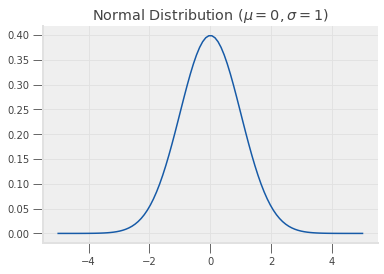

In [22]:
# scipy is an extension of numpy, and the stats
# subpackage has tools for working with various probability distributions
import scipy.stats as st

x = np.linspace(-5, 5, 100)

# NOTE: first argument to st.norm is mean, second is standard deviation sigma (not sigma^2)
pdf_x = st.norm(0.0, 1.0).pdf(x)

fig, ax = plt.subplots()

ax.set_title(r"Normal Distribution ($\mu = 0, \sigma = 1$)")
ax.plot(x, pdf_x)

Another common continuous distribution used in economics is the gamma distribution.

A gamma distribution is defined for all positive numbers and described by both a shape
parameter $ k $ and a scale parameter $ \theta $.

Let’s see what the distribution looks like for various choices of $ k $ and $ \theta $.

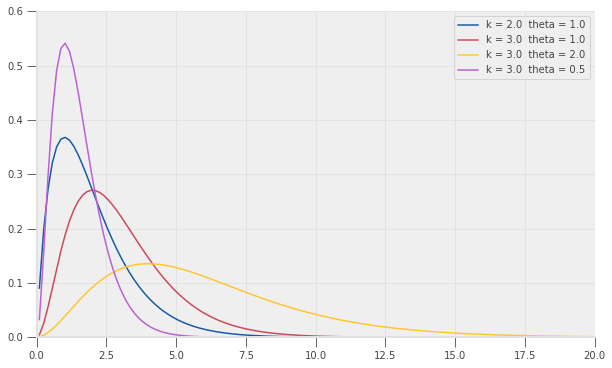

In [23]:
def plot_gamma(k, theta, x, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    # scipy refers to the rate parameter beta as a scale parameter
    pdf_x = st.gamma(k, scale=theta).pdf(x)
    ax.plot(x, pdf_x, label=f"k = {k}  theta = {theta}")

    return ax

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0.1, 20, 130)
plot_gamma(2.0, 1.0, x, ax)
plot_gamma(3.0, 1.0, x, ax)
plot_gamma(3.0, 2.0, x, ax)
plot_gamma(3.0, 0.5, x, ax)
ax.set_ylim((0, 0.6))
ax.set_xlim((0, 20))
ax.legend();